In [104]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [105]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [106]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [107]:
# create engine to hawaii.sqlite
#engine = create_engine("sqlite:///hawaii.sqlite")
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [108]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [109]:
# View all of the classes that automap found
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [110]:
# Save references to each table
Station = Base.classes.station
Measurement= Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

## Bonus Challenge Assignment: Temperature Analysis II

In [111]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs).label("TMIN"), func.avg(Measurement.tobs).label("TAVE"), func.max(Measurement.tobs).label("TMAX)")).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [112]:
#start_date = '2017-08-01'
#end_date = '2017-08-07'
def calc_temps(start_date, end_date):
    return (session.query(func.min(Measurement.tobs).label("TMIN"), func.avg(Measurement.tobs).label("TAVG"), func.max(Measurement.tobs).label("TMAX")).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all())
        
min_max_avg_temp = calc_temps('2012-02-28', '2012-03-05')
all_tobs_data_user_date_range = []
for row in min_max_avg_temp:
        tobs_temp_date_range_dict = {}
        tobs_temp_date_range_dict["min_tobs"] = row.TMIN
        tobs_temp_date_range_dict["max_tobs"] = row.TMAX
        tobs_temp_date_range_dict["avg_tobs"] = row.TAVG
        all_tobs_data_user_date_range.append(tobs_temp_date_range_dict)
        
all_tobs_data_user_date_range

[{'min_tobs': 62.0, 'max_tobs': 74.0, 'avg_tobs': 69.57142857142857}]

In [113]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
start_date = '2016-08-01'
end_date =   '2017-08-01'
calc_temps_year = (calc_temps(start_date, end_date))
calc_temps_year

[(58.0, 74.64288840262581, 87.0)]

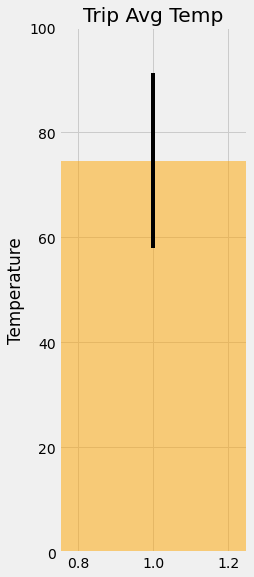

In [101]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

min_temp_year = calc_temps_year[0][0]
avg_temp_year  = calc_temps_year[0][1]
max_temp_year = calc_temps_year[0][2]
x = 1
y = avg_temp_year 

#plt.title("Trip Avg Temp")
plt.figure(figsize=(3,9))
plt.ylim(0,100)
plt.xlim(0.75,1.25)
error_1 = min_temp_year  - avg_temp_year
plt.bar(x,y, yerr= error_1, align="center",alpha=0.5, color='orange')
plt.ylabel("Temperature")
plt.title("Trip Avg Temp")
plt.show()

### Daily Rainfall Average

In [114]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2016-08-01'
end_date =   '2017-08-01'
query_results_rainfall = session.query(Measurement.station, func.sum(Measurement.prcp) )\
    .filter(Measurement.date >=start_date)\
    .filter(Measurement.date <=end_date)\
    .group_by(Measurement.station)\
    .order_by(func.sum(Measurement.prcp).desc()).all()
query_results_rainfall

[('USC00516128', 157.91000000000005),
 ('USC00519281', 79.49000000000005),
 ('USC00513117', 54.39000000000004),
 ('USC00519523', 39.800000000000004),
 ('USC00514830', 34.25999999999999),
 ('USC00519397', 17.199999999999992),
 ('USC00517948', 4.77)]

In [116]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2016-08-01'
end_date =   '2017-08-01'
sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
query_results_rainfall = session.query(Measurement.station, func.sum(Measurement.prcp) )\
    .filter(Measurement.date >=start_date)\
    .filter(Measurement.date <=end_date)\
    .group_by(Measurement.station)\
    .order_by(func.sum(Measurement.prcp).desc()).all()
query_results_rainfall

[('USC00516128', 157.91000000000005),
 ('USC00519281', 79.49000000000005),
 ('USC00513117', 54.39000000000004),
 ('USC00519523', 39.800000000000004),
 ('USC00514830', 34.25999999999999),
 ('USC00519397', 17.199999999999992),
 ('USC00517948', 4.77)]

In [117]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session

In [118]:
 session.close()